## Cifar: Neuronales Netz bauen

https://www.cs.toronto.edu/~kriz/cifar.html

### ImageDataGenerator

=> https://keras.io/preprocessing/image/

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

import numpy as np

X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

[1]


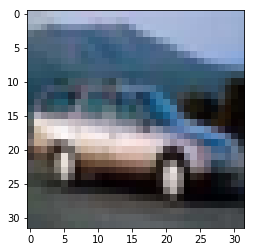

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[4])
plt.imshow(X_train[4])
plt.show()

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu", padding="same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [23]:
### Modell visualisieren: https://keras.io/visualization/
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [29]:
from keras.preprocessing.image import ImageDataGenerator

y_train_car = y_train == 1

gen = ImageDataGenerator(width_shift_range=3, height_shift_range=3, zoom_range=0.1, horizontal_flip=True)

model.fit_generator(gen.flow(X_train, y_train_car, batch_size=128, shuffle=True), epochs=50, workers=8)

Epoch 1/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0869 - acc: 0.9682
Epoch 2/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0823 - acc: 0.9702
Epoch 3/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0800 - acc: 0.9705
Epoch 4/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0775 - acc: 0.9712
Epoch 5/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0778 - acc: 0.9721
Epoch 6/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0741 - acc: 0.9732
Epoch 7/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0719 - acc: 0.9752
Epoch 8/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0711 - acc: 0.9742
Epoch 9/50
391/391 [==============================] - 26s 67ms/step - loss: 0.0695 - acc: 0.9753
Epoch 10/50
391/391 [==============================] - 26s 66ms/step - loss: 0.0693 - acc: 0.9754
Epoch 11/50
391/391 [========

KeyboardInterrupt: 

In [30]:
print(model.evaluate(X_train, y_train_car))

50000/50000 [==============================] - 9s 189us/step
[0.0413558853751421, 0.98704]


In [31]:
y_test_car = y_test == 1
print(model.evaluate(X_test, y_test_car))

10000/10000 [==============================] - 2s 189us/step
[0.05503138202875853, 0.9808]


In [32]:
model.save("cardetector.h5")